In [63]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report

import matplotlib.pyplot as plt

In [87]:
X = pd.read_csv('../src/data/trainOVA.txt',sep='|',index_col='ID')
y = X.iloc[:,-1]
X = X.drop(columns=[y.name])
cols = X.columns

In [88]:
def softmax(X):
    expx = np.exp(X.values)
    sm = expx/np.sum(expx,axis=1,keepdims=True)
    return sm

le = LabelEncoder()
le.classes_ = cols.values

X = softmax(X)
y = le.transform(y)

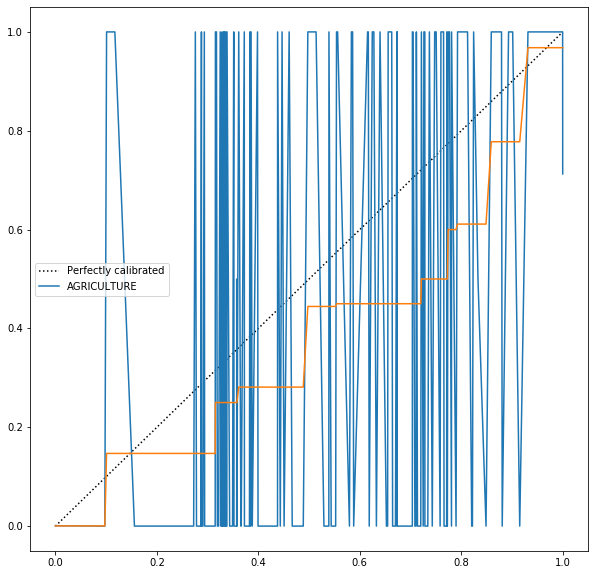

In [515]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for i in range(5):
    a,b = (calibration_curve(y==i,X[:,i],n_bins=10000, normalize=True))
#     print(a,b)
    plt.plot(b,a,label=le.inverse_transform([i])[0])    
    plt.plot(b,isotonic_regression(a))
    break
plt.legend()
# plt.legend(le.inverse_transform(range(7)))

In [502]:
from sklearn.isotonic import isotonic_regression


array([0.0173208 , 0.22058824, 0.22551253, 0.26315789, 0.26315789,
       0.34768523, 0.34768523, 0.34768523, 0.38686131, 0.58323353])

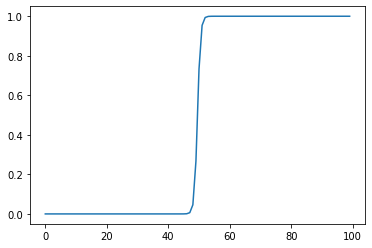

In [155]:
plt.plot(sigmoid(np.linspace(-100,100,100)))

In [163]:
b = sigmoid((inx-1.5)*10+3)
b.min(),b.max()

(1.1850648642339812e-27, 1.0)

In [175]:
def ratio(x):
    return x.sum()/x.size

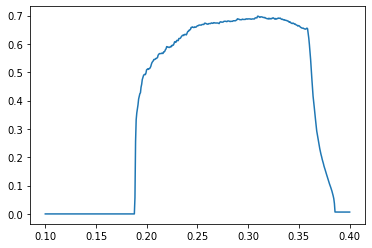

In [209]:
xin = np.linspace(0.1,0.4,500)
xout = [f1_score((y==0),(X[:,0]+i)>0.5) for i in xin]
plt.plot(xin, xout)

In [230]:
from scipy.optimize import differential_evolution
def eval_sol(i,c):
    return -f1_score((y==c),(X[:,c]+i)>0.5)
res = []
for i in range(7):
    print(i)
    de = differential_evolution(eval_sol,[(0.1,0.4)],popsize=15, tol=1e-5,args=[i])
    res.append((de.x,-de.fun))


0
1
2
3
4
5
6


In [268]:
i = np.random.rand(7).reshape(1,-1)


0.10584998166942718

In [569]:
np.arange(14).reshape(2,1,-1)

array([[[ 0,  1,  2,  3,  4,  5,  6]],

       [[ 7,  8,  9, 10, 11, 12, 13]]])

In [ ]:
def eval_sol2(i):
    return -accuracy_score(y,np.argmax(X+i.reshape(1,-1),axis=1),sample_weight=y_weights)

de = differential_evolution(eval_sol2,[(-1,1)]*len(le.classes_),popsize=30, tol=1e-4, workers=-1)



In [585]:
# sol = np.random.rand(7*2)
def eval_sol3(sol):
    A,B = sol.reshape(2,1,-1)
    return -f1_score(y,np.argmax(sigmoid(X*A+B),axis=1),average='weighted',sample_weight=y_weights)

de = differential_evolution(eval_sol3,[(1e-10,10)]*len(le.classes_)+[(-10,10)]*len(le.classes_),popsize=30, tol=1e-4, workers=-1)



/home/guillermo/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:494: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  " updating='deferred'", UserWarning)


In [586]:
de

     fun: -0.675254669040522
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 420435
     nit: 1000
 success: False
       x: array([ 8.80176534,  8.7045419 ,  8.82069399,  6.90129026,  6.30651166,
        7.57759705,  7.63134859,  5.98423542,  4.95399422,  6.28362066,
        5.6530072 ,  6.29280159, -0.96992629,  6.28830544])

In [587]:
# sigmoid adjust
A,B = de.x.reshape(2,1,-1)
print(classification_report(y,np.argmax(sigmoid(X*A+B),axis=1),digits=3,target_names=le.classes_,sample_weight=y_weights))

              precision    recall  f1-score   support

 AGRICULTURE      0.813     0.734     0.771 0.01878984102805274
  INDUSTRIAL      0.765     0.673     0.716 0.18912110538528332
      OFFICE      0.436     0.381     0.407 0.09741369155727717
       OTHER      0.659     0.508     0.573 0.04884169643401088
      PUBLIC      0.484     0.496     0.490 0.12165488517845348
 RESIDENTIAL      0.777     0.901     0.835 0.43396226415179473
      RETAIL      0.472     0.344     0.398 0.0902165162659927

    accuracy                          0.686 1.000000000000865
   macro avg      0.629     0.577     0.599 1.000000000000865
weighted avg      0.673     0.686     0.675 1.000000000000865



In [589]:
# sigmoid adjust no weight
A,B = de.x.reshape(2,1,-1)
print(classification_report(y,np.argmax(sigmoid(X*A+B),axis=1),digits=3,target_names=le.classes_))

              precision    recall  f1-score   support

 AGRICULTURE      0.644     0.734     0.686       338
  INDUSTRIAL      0.686     0.673     0.679      4490
      OFFICE      0.182     0.381     0.246      1828
       OTHER      0.547     0.508     0.527      1332
      PUBLIC      0.240     0.496     0.324      2976
 RESIDENTIAL      0.969     0.901     0.934     90173
      RETAIL      0.214     0.344     0.263      2093

    accuracy                          0.854    103230
   macro avg      0.497     0.577     0.523    103230
weighted avg      0.900     0.854     0.874    103230



In [591]:
# sigmoid adjust no weight
print(classification_report(y,np.argmax(X,axis=1),digits=3,target_names=le.classes_))

              precision    recall  f1-score   support

 AGRICULTURE      0.707     0.692     0.700       338
  INDUSTRIAL      0.724     0.671     0.696      4490
      OFFICE      0.435     0.167     0.242      1828
       OTHER      0.611     0.471     0.532      1332
      PUBLIC      0.481     0.294     0.365      2976
 RESIDENTIAL      0.941     0.987     0.964     90173
      RETAIL      0.615     0.202     0.304      2093

    accuracy                          0.915    103230
   macro avg      0.645     0.498     0.543    103230
weighted avg      0.898     0.915     0.902    103230



In [452]:
cv_ratiofset
print(classification_report(y,np.argmax(X + de.x.reshape(1,-1),axis=1),digits=3,target_names=le.classes_,sample_weight=y_weights))

              precision    recall  f1-score   support

 AGRICULTURE      0.817     0.731     0.772 0.018848928578455475
  INDUSTRIAL      0.730     0.711     0.721 0.18971582584246616
      OFFICE      0.512     0.270     0.354 0.09772002392066206
       OTHER      0.604     0.557     0.580 0.04899528667437097
      PUBLIC      0.515     0.472     0.493 0.12203744771046363
 RESIDENTIAL      0.746     0.933     0.829 0.43218227127018244
      RETAIL      0.543     0.299     0.385 0.09050021600267946

    accuracy                          0.690 0.9999999999992802
   macro avg      0.638     0.568     0.590 0.9999999999992802
weighted avg      0.668     0.690     0.668 0.9999999999992802



In [451]:
print(classification_report(y,X.argmax(1),target_names=le.classes_,digits=3,sample_weight=y_weights))

              precision    recall  f1-score   support

 AGRICULTURE      0.831     0.692     0.755 0.018848928578455475
  INDUSTRIAL      0.759     0.671     0.712 0.18971582584246616
      OFFICE      0.588     0.167     0.261 0.09772002392066206
       OTHER      0.660     0.471     0.550 0.04899528667437097
      PUBLIC      0.603     0.294     0.395 0.12203744771046363
 RESIDENTIAL      0.638     0.987     0.775 0.43218227127018244
      RETAIL      0.707     0.202     0.314 0.09050021600267946

    accuracy                          0.660 0.9999999999992802
   macro avg      0.684     0.498     0.538 0.9999999999992802
weighted avg      0.663     0.660     0.613 0.9999999999992802



In [588]:
cv_ratio

array([0.97928994, 0.92761693, 0.38512035, 0.77177177, 0.6108871 ,
       1.04794118, 0.32871476])

In [598]:
# Load data
X = pd.read_csv('../src/data/trainOVA.txt',sep='|',index_col='ID')
y = X.iloc[:,-1]
X = X.drop(columns=[y.name])
cols = X.columns

le = LabelEncoder()
le.classes_ = cols.values

X = X.values
y = le.transform(y)
yp = X.argmax(axis=1)

yp_ts = le.transform(pd.read_csv('../src/predictions/Minsait_UniversidadGranada_CodeDigger_1.txt',sep='|').iloc[:,1])

# Calc cv compensation ratio
_,c_true = np.unique(y,return_counts=True)
_,c_pred = np.unique(yp,return_counts=True)

cv_ratio = c_pred/c_true

# Calc test ratio
_,c_pred_test = np.unique(yp_ts,return_counts=True)
adjusted_c_test = c_pred_test/cv_ratio
# adjusted_c_test = c_pred_test.astype(np.float)

factor = 3180/5618 #guessed residential from plot / total test

# Estimate 
class_weight = np.delete(adjusted_c_test,5)
class_weight *= factor/class_weight.sum()
class_weight = np.insert(class_weight,5,1-factor)

y_weights = (class_weight/c_true)[y]

print(classification_report(y,X.argmax(1),target_names=le.classes_,digits=3,sample_weight=y_weights))

              precision    recall  f1-score   support

 AGRICULTURE      0.831     0.692     0.755 0.01878984102805274
  INDUSTRIAL      0.758     0.671     0.712 0.18912110538528332
      OFFICE      0.588     0.167     0.261 0.09741369155727717
       OTHER      0.660     0.471     0.550 0.04884169643401088
      PUBLIC      0.603     0.294     0.395 0.12165488517845346
 RESIDENTIAL      0.640     0.987     0.776 0.43396226415179473
      RETAIL      0.707     0.202     0.314 0.0902165162659927

    accuracy                          0.661 1.000000000000865
   macro avg      0.684     0.498     0.538 1.000000000000865
weighted avg      0.663     0.661     0.614 1.000000000000865



In [609]:
pd.DataFrame(np.array([pd.read_csv('../src/data/trainOVA.txt',sep='|',index_col='ID').index.values,y_weights]).T,columns=['ID','weight']).set_index('ID').to_csv('../src/data/train_weights.cvs',sep='|')

,weight
ID,
35984B9C3E7CD9A1,4.81255e-06
F9D04BF6D037F8FB,4.81255e-06
B89D5711AFF8C423,4.81255e-06
1C3478AC1522E7E4,4.81255e-06
4D12AA5009064345,4.81255e-06
...,...
C5FD596EB22DB167,4.81255e-06
A51D42F2EAB0E15E,4.81255e-06
9B75473FE6396523,4.21205e-05


In [597]:
class_weight,y_weights

(array([0.01878984, 0.18912111, 0.09741369, 0.0488417 , 0.12165489,
        0.43396226, 0.09021652]),
 array([4.81255214e-06, 4.81255214e-06, 4.81255214e-06, ...,
        4.21205134e-05, 4.81255214e-06, 4.81255214e-06]))

In [595]:
np.unique(yp_ts,return_counts=True)[1]/cv_ratio

array([ 105.17824773, 1058.62665066,  545.28409091,  273.39688716,
        680.97689769, 3368.50967237,  504.99709302])

In [472]:
class_weight.sum()

1.0

In [391]:
factor

0.5678177287290851

<BarContainer object of 7 artists>

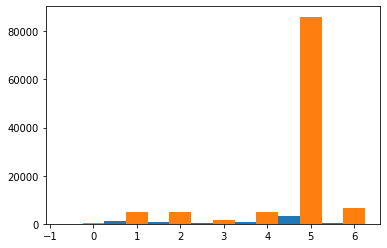

In [338]:
i2,c2 = np.unique(yp_test,return_counts=True)
c2 = c2/(np.unique(np.argmax(X,axis=1),return_counts=True)[1]/np.unique(y,return_counts=True)[1])
plt.bar(np.arange(7)-0.5,c2,0.5)
plt.bar(np.arange(7),c1,0.5)

In [332]:
i,c1 = np.unique(y,return_counts=True)
c1 = c1/(np.unique(np.argmax(X,axis=1),return_counts=True)[1]/np.unique(y,return_counts=True)[1])
cm = np.delete(c1,5)
factor = 3190/5618
cmf = cm/cm.sum()*factor
cmf = np.concatenate([cmf[:-1],[1-factor],cmf[-1:]])

In [326]:
cmf

array([0.00855933, 0.12003608, 0.11771013, 0.04280056, 0.1208109 ,
       0.43218227, 0.15790073])

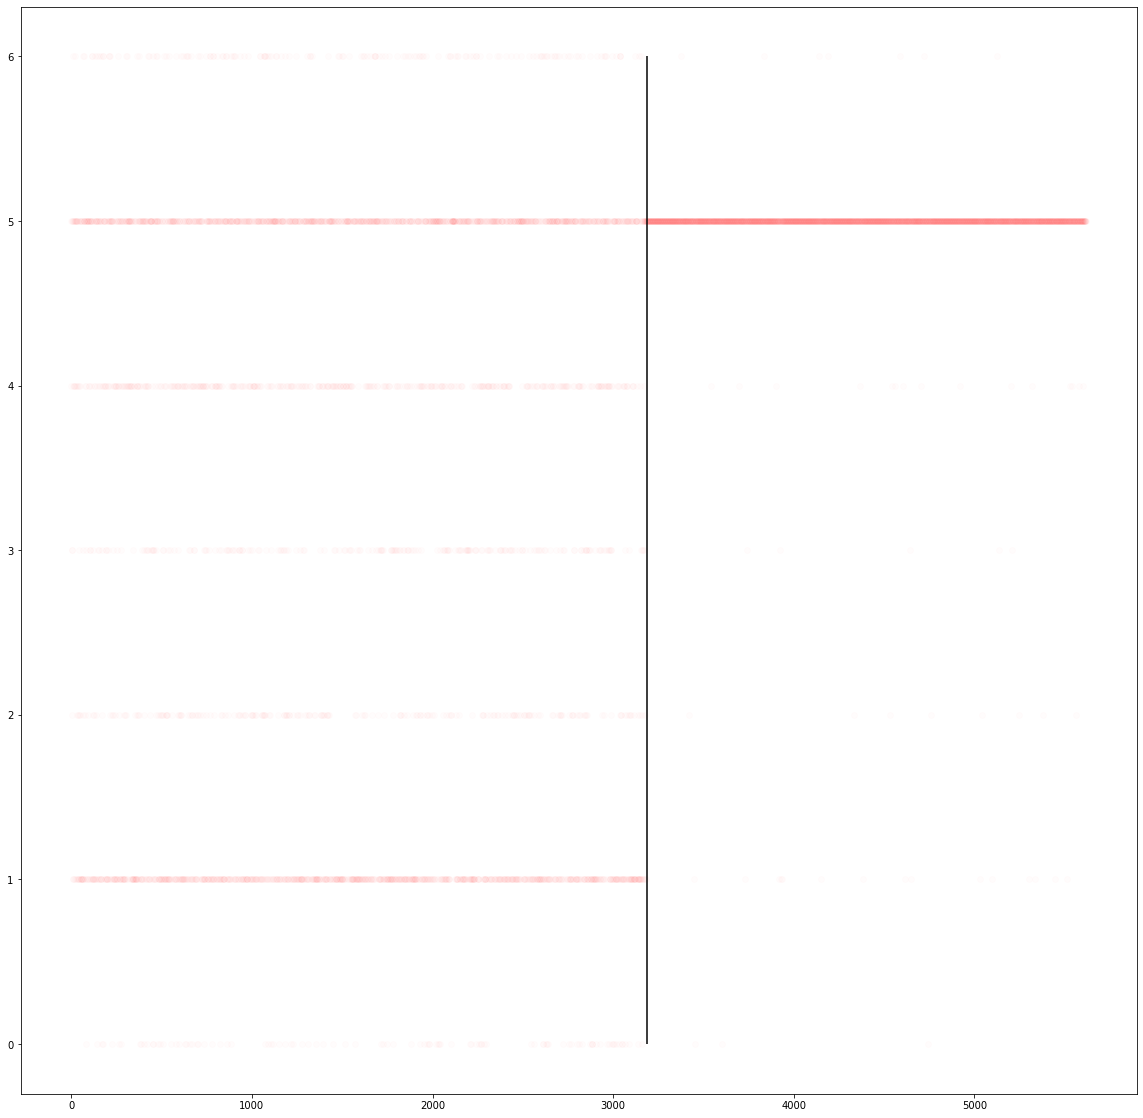

In [462]:
yp_test = le.transform(pd.read_csv('../src/predictions/Minsait_UniversidadGranada_CodeDigger_1.txt',sep='|').iloc[:,1])
plt.figure(figsize=(20,20))
plt.scatter(np.arange(yp_test.size),yp_test,c='red',alpha=0.01)
plt.vlines([3190],0,6)

(103230, 7)

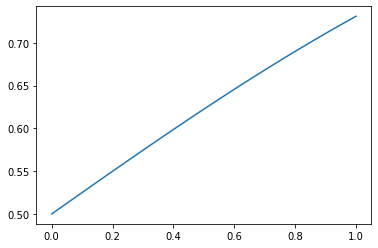

In [575]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
inx = np.linspace(0,1,100)
a = 1
b = 0
plt.figure()
plt.plot(inx,sigmoid((inx*a+b)))


In [227]:
print(classification_report(y,X.argmax(1)))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       338
           1       0.72      0.67      0.70      4490
           2       0.43      0.17      0.24      1828
           3       0.61      0.47      0.53      1332
           4       0.48      0.29      0.37      2976
           5       0.94      0.99      0.96     90173
           6       0.61      0.20      0.30      2093

    accuracy                           0.91    103230
   macro avg       0.64      0.50      0.54    103230
weighted avg       0.90      0.91      0.90    103230



In [483]:
np.exp(-np.inf)

0.0

In [519]:
A=B=1
A=1
B=0
v=-np.inf
1/(1+np.exp(A*v+B))

1.0

In [487]:
np.exp(0)

1.0

In [97]:
np.min(X,axis=0),np.max(X,axis=0),

(array([0.08098721, 0.08565703, 0.08578686, 0.08099881, 0.08464791,
        0.0809947 , 0.08461894]),
 array([0.31176028, 0.3117822 , 0.31137308, 0.31175604, 0.31176799,
        0.31179047, 0.31166697]))

In [66]:
print(classification_report(y,X.argmax(1)))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       338
           1       0.72      0.67      0.70      4490
           2       0.43      0.17      0.24      1828
           3       0.61      0.47      0.53      1332
           4       0.48      0.29      0.37      2976
           5       0.94      0.99      0.96     90173
           6       0.61      0.20      0.30      2093

    accuracy                           0.91    103230
   macro avg       0.64      0.50      0.54    103230
weighted avg       0.90      0.91      0.90    103230



In [42]:
(y==0).sum(),X[:,0]

(0, array([0.11470028, 0.11470305, 0.11470129, ..., 0.11430627, 0.11470243,
        0.11472545]))

In [37]:
pd.read_csv('../src/data/trainOVA.txt',sep='|',index_col='ID')

,AGRICULTURE,INDUSTRIAL,OFFICE,OTHER,PUBLIC,RESIDENTIAL,RETAIL,CLASE
ID,,,,,,,,
35984B9C3E7CD9A1,0.0,0.000030,2.664923e-06,1.211189e-06,0.000160,0.999962,0.000004,RESIDENTIAL
F9D04BF6D037F8FB,0.0,0.000015,9.230590e-07,2.649309e-05,0.000006,0.999935,0.000011,RESIDENTIAL
B89D5711AFF8C423,0.0,0.000029,2.270355e-05,2.122030e-06,0.000015,0.999979,0.000002,RESIDENTIAL
1C3478AC1522E7E4,0.0,0.000033,6.628561e-05,2.634820e-07,0.000076,0.999799,0.000005,RESIDENTIAL
4D12AA5009064345,0.0,0.013848,2.957751e-01,1.790987e-03,0.058392,0.097682,0.000068,RESIDENTIAL
...,...,...,...,...,...,...,...,...
C5FD596EB22DB167,0.0,0.000102,3.751364e-06,1.983808e-05,0.000007,0.998855,0.000515,RESIDENTIAL
A51D42F2EAB0E15E,0.0,0.000005,2.146415e-06,2.779864e-05,0.000010,0.999997,0.000001,RESIDENTIAL
9B75473FE6396523,0.0,0.999156,2.642828e-02,1.224911e-04,0.000045,0.005441,0.000034,INDUSTRIAL
